## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df=pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=mouse_study_df["Mouse ID"].nunique()
print(f"The Number of Mice Used in the Study is: {mouse_count}")

The Number of Mice Used in the Study is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_mice=mouse_study_df.groupby("Mouse ID")["Timepoint"].value_counts()
dupe_hold=dupe_mice[dupe_mice>1]
dupe_hold_df=pd.DataFrame(dupe_hold)
dupe_hold_df.rename(columns={"Timepoint":"Timepoint Count"},inplace=True)
dupe_hold_df


Timepoint Count
Mouse ID Timepoint                 
g989     0                        2
         5                        2
         10                       2
         15                       2
         20                       2

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# This is how to return all recods for a dataframe where there are duplicates across multiple columns 

allduperecs=mouse_study_df[mouse_study_df.duplicated(['Mouse ID', "Timepoint"])]
allduperecs


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mouse_study_clean_df=mouse_study_df[mouse_study_df["Mouse ID"]!="g989"]
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
kept_mouse_count=mouse_study_clean_df["Mouse ID"].nunique()
print(f"The Number of Mice in the Clean Data is:{kept_mouse_count}")

The Number of Mice in the Clean Data is:248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regtum_df=mouse_study_clean_df[["Drug Regimen","Tumor Volume (mm3)"]]

tumave=regtum_df["Tumor Volume (mm3)"].mean()
tummed=regtum_df["Tumor Volume (mm3)"].median()
tumvar=regtum_df["Tumor Volume (mm3)"].var()
tumstd=regtum_df["Tumor Volume (mm3)"].std()
tumsem=regtum_df["Tumor Volume (mm3)"].sem()
#tumdes=regtum_df["Tumor Volume (mm3)"].agg(["mean","median", "var","std", "sem"])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regtum_df["Ave Tumor Vol"]=tumave
regtum_df["Median Tumor Vol"]=tummed
regtum_df["Tumor Vol Variance"]=tumvar
regtum_df["Tumor Vol Stand Dev"]=tumstd
regtum_df["Tumor Vol Stand Error"]=tumsem

regtum_df

,Drug Regimen,Tumor Volume (mm3),Ave Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Stand Dev,Tumor Vol Stand Error
0,Ramicane,45.000000,50.435293,48.933454,79.462907,8.914197,0.205591
1,Ramicane,38.825898,50.435293,48.933454,79.462907,8.914197,0.205591
2,Ramicane,35.014271,50.435293,48.933454,79.462907,8.914197,0.205591
3,Ramicane,34.223992,50.435293,48.933454,79.462907,8.914197,0.205591
4,Ramicane,32.997729,50.435293,48.933454,79.462907,8.914197,0.205591
...,...,...,...,...,...,...,...
1888,Naftisol,63.145652,50.435293,48.933454,79.462907,8.914197,0.205591
1889,Naftisol,65.841013,50.435293,48.933454,79.462907,8.914197,0.205591
1890,Naftisol,69.176246,50.435293,48.933454,79.462907,8.914197,0.205591
1891,Naftisol,70.314904,50.435293,48.933454,79.462907,8.914197,0.205591


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

ms_cleangrp=mouse_study_clean_df.groupby("Drug Regimen")
tum_stats=ms_cleangrp["Tumor Volume (mm3)"].agg(["mean", "median","var", "std", "sem"])
tum_stats


# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

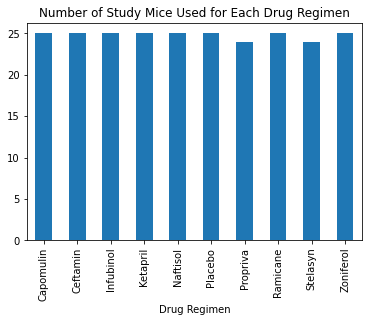

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

reg_mice=ms_cleangrp["Mouse ID"].nunique()
reg_mice.plot(kind="bar")
plt.title("Number of Study Mice Used for Each Drug Regimen")
plt.show()

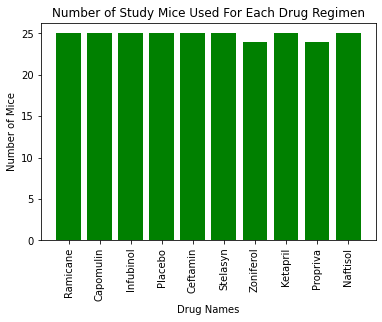

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

reg_list=mouse_study_clean_df["Drug Regimen"].unique()
reg_mice=ms_cleangrp["Mouse ID"].nunique()

xaxis=np.arange(0, len(reg_list))
ticks=[]
for x in xaxis:
    ticks.append(x)

plt.title("Number of Study Mice Used For Each Drug Regimen")
plt.xlabel("Drug Names")
plt.ylabel("Number of Mice")


plt.bar(xaxis,reg_mice,facecolor="green", align="center")
plt.xticks(ticks,reg_list, rotation=90)
plt.show()

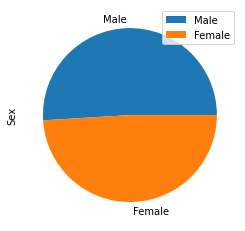

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ms_malsex=mouse_study_clean_df.loc[mouse_study_clean_df["Sex"] == "Male",:]
ms_femsex=mouse_study_clean_df.loc[mouse_study_clean_df["Sex"] == "Female",:]
malcnt=ms_malsex["Mouse ID"].count()
femcnt=ms_femsex["Mouse ID"].count()
totcnt=mouse_study_clean_df["Mouse ID"].count()

codetest=pd.DataFrame({"Sex": [malcnt,femcnt]},index=["Male", "Female"])
codetest.plot.pie(y="Sex")
plt.show()

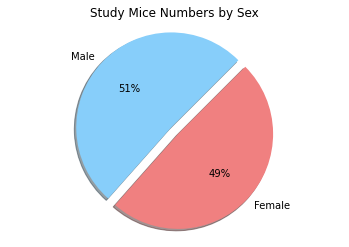

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex=["Male","Female"]
micebysex=[malcnt,femcnt]

chart_colors=["lightskyblue", "lightcoral"]
chart_explode=(0,0.1)
plt.title("Study Mice Numbers by Sex")
plt.pie(micebysex,labels=mouse_sex, colors=chart_colors, autopct="%1.0f%%", shadow=True, startangle=45,explode=chart_explode)
plt.axis("equal")
plt.show()


In [13]:
#reprint orginal datframe to be able to see the data columns without scrolling in the notebook
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse


# Created 2 dataframes from 2 groupbys.  Originally was tyring to mherge on Mouse ID but Perhaps because one of the groupbys had 2 groupby columns they might both be keys so to get the merge to include all of the columns I had to add the other key (Drug Regimen) to the other dataframe
testa=mouse_study_clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].last()
testa_df=pd.DataFrame(testa)
testb=mouse_study_clean_df.groupby(["Drug Regimen" ,"Mouse ID"])["Tumor Volume (mm3)"].last()
testb_df=pd.DataFrame(testb)
testmerge_df=pd.merge(testb_df,testa_df, on=["Drug Regimen","Mouse ID"], how="inner")
testmerge_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               38.982878         45
             b742               38.939633         45
             f966               30.485985         20
             g288               37.074024         45
             g316               40.159220         45

In [44]:
# Put treatments into a list for for loop (and later for plot labels)

treat_series=mouse_study_clean_df["Drug Regimen"]
treat_hold=[]
treat_hold =[dr for dr in treat_series if dr not in treat_hold]
treat_set=set(treat_hold)
treat_list=list(treat_set)
# Create empty list to fill with tumor vol data (for plotting)

tumvol_list=[]
tumvol_series=mouse_study_clean_df["Tumor Volume (mm3)"]
for tv in tumvol_series:
    tumvol_list.append(tv)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
 
tumvol_qrt=tumvol_series.quantile([.25,.5,.75])
lowqrt=round(tumvol_qrt[0.25],2)
upqrt=round(tumvol_qrt[0.75],2)
iqr=round(upqrt-lowqrt,2)
medqrt=round(tumvol_qrt[0.5],2)

print(f"The Lower Quartile for Tumor Volumes is: {lowqrt}")
print(f"The Upper Quartile for Tumor Volumes is: {upqrt}")
print(f"The Lower Interquartile for Tumor Volumes is: {iqr}")
print(f"The Median of Tumor Volumes is: {medqrt}")

low_bnd=round(lowqrt-(1.5*iqr),2)
upbnd=round(upqrt+(1.5*iqr),2)

print(f"Values Below {low_bnd} Are Possible Outliers")
print(f"Values Above {upbnd} Are Possible Outliers")

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The Lower Quartile for Tumor Volumes is: 45.0
The Upper Quartile for Tumor Volumes is: 56.32
The Lower Interquartile for Tumor Volumes is: 11.32
The Median of Tumor Volumes is: 48.93
Values Below 28.02 Are Possible Outliers
Values Above 73.3 Are Possible Outliers


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
